In [17]:
import pickle
with open('addons/imr90/coop_matrix_all_new_spaced_sub_2.pkl', 'rb') as handle:
    values_fresh = pickle.load(handle)

In [18]:
values_fresh.keys()

dict_keys(['ZEB-AP1', 'TEAD-AP1', 'control'])

In [19]:
#vals, label = values_fresh['metacluster_0.pattern_0-metacluster_0.pattern_0']
vals, label = values_fresh['ZEB-AP1']

In [20]:
print(label)

ZEB-AP1


In [21]:
[motif1_only, motif2_only, data_in_spacings, motif1_only_rev, motif2_only_rev, data_in_spacings_rev, distance] = vals

In [22]:
control = values_fresh['control']

In [23]:
from statsmodels.regression.linear_model import OLS
import numpy as np

In [48]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals = []
m1_vals = []
m2_vals = []
for idx in range(len(distance)):
    plot_dist.append(distance[idx])
    plot_vals.append(np.log(np.mean(np.squeeze(all_data[idx][1]), axis=-1)))
    m1_vals.append(np.log(np.mean(np.squeeze(all_data_m1[idx][1]), axis=-1)))
    m2_vals.append(np.log(np.mean(np.squeeze(all_data_m2[idx][1]), axis=-1)))
    
    

In [49]:
import matplotlib.pyplot as plt

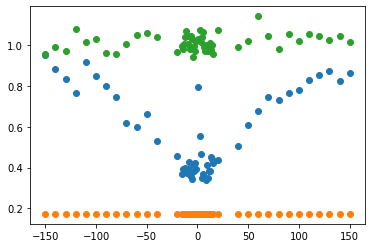

In [50]:
plt.scatter(plot_dist, plot_vals-np.mean(np.log(control[1])))
#plt.axhline(y = np.mean(np.log(control[1])), color = 'r', linestyle = 'dashed')    
plt.scatter(plot_dist, m1_vals-np.mean(np.log(control[1])))
plt.scatter(plot_dist, m2_vals-np.mean(np.log(control[1])))


In [11]:
np.argmin(np.exp(plot_vals)-np.mean(control[1]))

7

In [12]:
print(plot_dist[7])

8


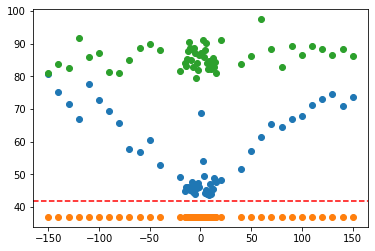

In [11]:
plt.scatter(plot_dist, np.exp(plot_vals))
plt.axhline(y = np.mean(control[1]), color = 'r', linestyle = 'dashed')    
plt.scatter(plot_dist, np.exp(m1_vals))
plt.scatter(plot_dist, np.exp(m2_vals))


In [12]:
np.min(np.exp(plot_vals))

43.72696

In [13]:
np.argmin(np.exp(plot_vals))

7

36.987663


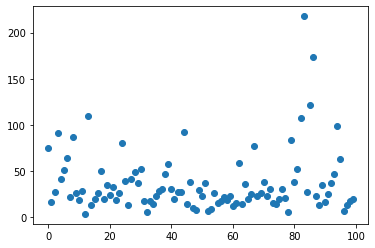

In [14]:
idx=7
plt.scatter(np.arange(100),all_data_m1[idx][1])
print(np.mean(all_data_m1[idx][1]))

84.79952


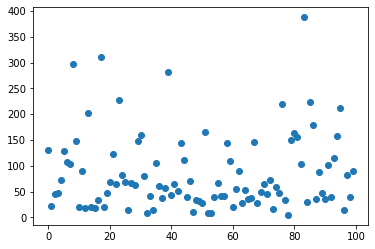

In [15]:
idx=7
plt.scatter(np.arange(100),all_data_m2[idx][1])
print(np.mean(all_data_m2[idx][1]))

41.862362


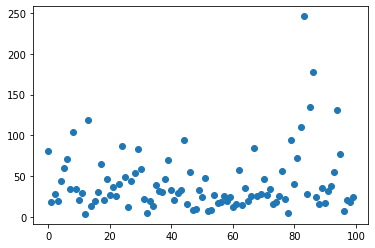

In [16]:
plt.scatter(np.arange(100),control[1])
print(np.mean(control[1]))

43.726963


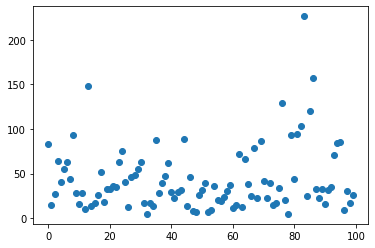

In [17]:
idx=7
plt.scatter(np.arange(100),all_data[idx][1])
print(np.mean(all_data[idx][1]))

In [18]:
control[1].shape

(100, 1)

In [19]:
controlm = np.mean(control[1])

# y =  alpha * m1 + beta* m2 + gamme*(a*b)+yeta*d  (y,m1,m2 are average response)

In [20]:
Y = plot_vals
d = plot_dist
X = np.array([m1_vals-np.log(controlm), m2_vals-np.log(controlm), (m1_vals-np.log(controlm))*(m2_vals-np.log(controlm)), d]).transpose()
print(X.shape)

(56, 4)


In [21]:
model = OLS(Y,X)

In [22]:
results = model.fit()

In [23]:
print(results.t_test([1, 0, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           -28.6178      4.321     -6.623      0.000     -37.289     -19.947


In [24]:
print(results.t_test([0, 1, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          6.486e+05   1.67e+06      0.388      0.699    -2.7e+06       4e+06


In [25]:
print(results.t_test([0, 0, 1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          5.239e+06   1.35e+07      0.388      0.699   -2.18e+07    3.23e+07


In [26]:
print(results.t_test([0, 0, 0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0001      0.000     -0.337      0.737      -0.001       0.001


In [27]:
model

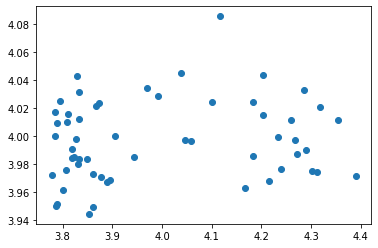

In [28]:
plt.scatter(Y,results.predict())

# # y =  alpha * m1 + beta* m2 + gamme*(a*b)+yeta*d  (y,m1,m2 are not average response)


In [29]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals = []
m1_vals = []
m2_vals = []
control1 = []
for idx in range(len(distance)):
    plot_vals.append(np.log(np.squeeze(all_data[idx][1])))
    m1_vals.append(np.log(np.squeeze(all_data_m1[idx][1])))
    m2_vals.append(np.log(np.squeeze(all_data_m2[idx][1])))
    plot_dist.append([distance[idx]]*all_data[idx][1].shape[0])
    control1.append(np.log(np.squeeze(control[1])))
    

In [30]:
Y = np.array(plot_vals).flatten()
d = np.array(plot_dist).flatten()
m1 = np.array(m1_vals).flatten()
m2 = np.array(m2_vals).flatten()
controls = np.array(control1).flatten()
X = np.array([m1-controls, m2-controls, (m1-controls)*(m2-controls), d]).transpose()
import statsmodels.api as sm
X = sm.add_constant(X)

print(X.shape)

(5600, 5)


In [31]:
model = OLS(Y,X)

In [32]:
results = model.fit()

In [33]:
print(results.t_test([1, 0, 0, 0,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.4851      0.019    184.297      0.000       3.448       3.522


In [34]:
print(results.t_test([0, 1, 0, 0,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.1019      0.080     -1.279      0.201      -0.258       0.054


In [35]:
print(results.t_test([0, 0, 1, 0,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2710      0.029      9.292      0.000       0.214       0.328


In [36]:
print(results.t_test([0, 0, 0, 1,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0520      0.108      0.484      0.629      -0.159       0.263


In [37]:
print(results.t_test([0, 0, 0, 0,1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           1.57e-05      0.000      0.094      0.925      -0.000       0.000


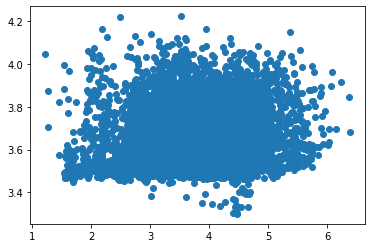

In [38]:
plt.scatter(Y,results.predict())

In [39]:
from scipy.stats import pearsonr

In [40]:
pearsonr(Y,results.predict())

(0.17011658891357856, 1.2495752577566415e-37)

# y =  alpha * m1 + beta* m2 + gamme*(a*b)  (for max distance)


In [53]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals_mean = []
m1_vals = []
m2_vals = []
control1 = []
plot_vals = []
for idx in range(len(distance)):
    plot_vals_mean.append(np.log(np.mean(np.squeeze(all_data[idx][1]), axis=-1)))
    plot_vals.append(np.log(np.squeeze(all_data[idx][1])))
    m1_vals.append(np.log(np.squeeze(all_data_m1[idx][1])))
    m2_vals.append(np.log(np.squeeze(all_data_m2[idx][1])))
    plot_dist.append([distance[idx]]*all_data[idx][1].shape[0])
    control1.append(np.log(np.squeeze(control[1])))
    

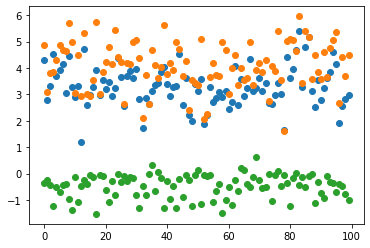

In [54]:
plt.scatter(np.arange(100),m1_vals[7].flatten())
plt.scatter(np.arange(100),m2_vals[7].flatten())
plt.scatter(np.arange(100),(plot_vals[7]-m1_vals[7]-m2_vals[7]+control1[7]).flatten())

In [55]:
np.mean(np.exp(m1_vals[7].flatten()))

36.987663

In [56]:
np.mean(np.exp(m2_vals[7].flatten()))

84.79952

In [57]:
np.mean(np.exp(plot_vals[7].flatten()))

43.726963

In [58]:
plot_vals_mean[8]

3.8488505

In [59]:
#Y.shape

In [61]:
idx=7
m1 = np.array(m1_vals[idx]).flatten()
m2 = np.array(m2_vals[idx]).flatten()
controls = np.array(control1[idx]).flatten()
Y = np.array(plot_vals[idx]).flatten() - controls - (m1-controls) - (m2-controls)
X = np.array([(m1-controls)*(m2-controls)]).transpose()
#X = np.array([(m1-controls)*(m2-controls)]).transpose()
print(np.mean(Y))
#X = sm.add_constant(X)
print(X.shape)
print(Y.shape)

-0.47208184
(100, 1)
(100,)


In [62]:
print(np.mean(m1-controls))

-0.12509489


In [63]:
print(np.mean(m2-controls))

0.64565676


In [64]:
model = OLS(Y,X)

In [65]:
results = model.fit()

In [66]:
print(results.params)

[1.0633658]


In [67]:
print(results.t_test([1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0634      0.239      4.448      0.000       0.589       1.538


In [68]:
#print(results.t_test([0, 1, 0, 0]))

In [69]:
#print(results.t_test([0, 0, 1, 0]))

In [70]:
#print(results.t_test([0, 0, 0, 1]))

Text(0, 0.5, 'Predicted')

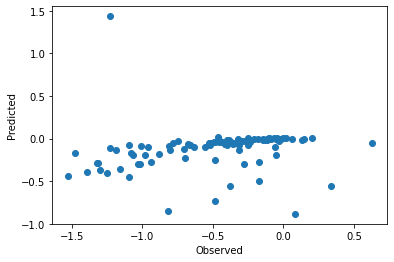

In [71]:
plt.scatter(Y,results.predict())
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [98]:
pearsonr(Y,results.predict())

(0.1531330540033729, 0.12824371097495318)

In [99]:
pearsonr(Y,m1)

(0.04321867419458533, 0.6694138012056383)

In [100]:
pearsonr(Y,m2)

(-0.38989350251769544, 6.076783492366976e-05)

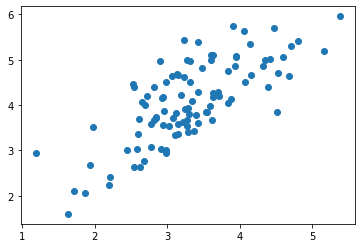

In [101]:
plt.scatter(m1,m2)


In [60]:
#m1_vals[7]

In [61]:
#m2_vals[7]

In [62]:
Y

array([ 1.97868347e-02, -1.75884485e-01, -5.53305149e-02,  1.18740177e+00,
       -6.30524158e-02, -7.96394348e-02, -1.22041702e-01,  2.33346462e-01,
       -1.03805065e-01, -1.65374994e-01, -2.40808964e-01, -3.59652042e-02,
        9.64280963e-01,  2.17632294e-01, -2.37772465e-02, -1.39989853e-01,
       -1.70779467e-01, -2.15190172e-01, -8.91835690e-02, -3.53680134e-01,
        1.88754320e-01, -2.23085880e-02,  3.23162317e-01,  4.41845894e-01,
       -1.41127586e-01, -1.88653708e-01,  1.12581253e-03,  6.72791004e-02,
       -1.09517097e-01, -3.99267673e-01,  7.49006271e-02, -2.55446672e-01,
       -2.17318535e-02, -1.42968893e-01,  1.29480362e-02,  8.06576729e-01,
       -1.19005919e-01,  2.35333920e-01,  1.27887726e-02, -1.13421917e-01,
       -1.20763063e-01,  1.04631662e-01,  1.45761967e-02, -3.14059258e-02,
       -5.03969193e-02, -1.83135509e-01, -1.63146019e-01, -5.61347008e-02,
       -3.17449927e-01, -2.26222277e-01,  2.61114120e-01, -1.76363707e-01,
       -8.37414265e-02, -

In [63]:
from scipy.stats import wilcoxon


In [64]:
wilcoxon(m1-2*controls+m2-Y)

WilcoxonResult(statistic=224.0, pvalue=2.5413138381742492e-15)